In [2]:
# winsorization -> capping by percentile_method

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df = pd.read_csv('weight-height.csv')

In [41]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Height'>

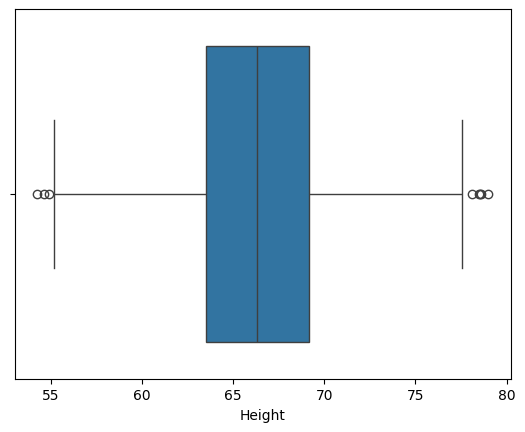

In [42]:
sns.boxplot(x =df['Height'])

In [43]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

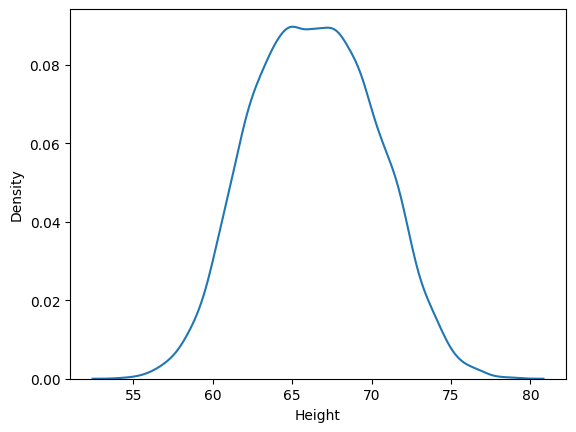

In [44]:
sns.kdeplot(df['Height'])

In [45]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [46]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [32]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


# trimming

In [30]:
new_df = df[ (df['Height']>58.13) & (df['Height']<74.78)]

In [31]:
new_df.shape

(9799, 3)

# capping -> winsorization

In [47]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [48]:
df['Height'].shape

(10000,)

In [49]:
df['Height'].describe()


count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

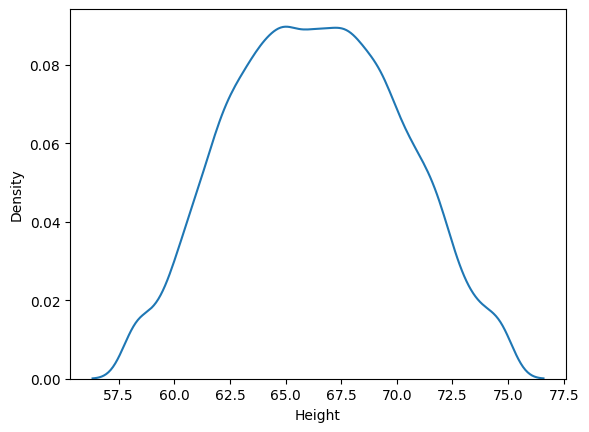

In [50]:
sns.kdeplot(df['Height'])


<Axes: xlabel='Height'>

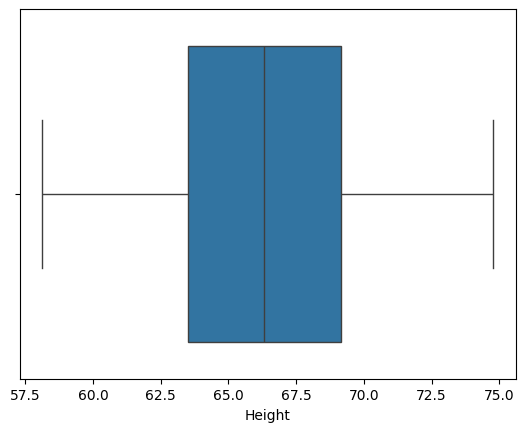

In [52]:
sns.boxplot(x=df['Height'])